# Pandas 基础

> [Pandas 官方文档](https://pandas.pydata.org/)  

> [Seaborn 数据集](https://github.com/mwaskom/seaborn-data)


## Pandas 数据结构
- DataFrame: 二维数据， 整个表格， 多行多列
- Series: 

![Pandas数据结构](.\\figures\\pandas数据结构.png)
<center>Fig. Pandas数据结构</center>


In [1]:
import numpy as np # 数值计算
import pandas as pd # 数据分析
import seaborn as sns # 

In [2]:
data_path = ".\\datasets\\"

In [3]:
pd.__version__

'1.1.1'

### Series

> 带索引的一维数组  

- 数据查询方法
    - 看作字典
    - 看作一维数组
    - 索引器: loc, iloc, ix

#### Series 与 字典

> Serise 可以看作字典和数组的结合  

In [10]:
cust_dict = {'id':'0001',
        'name':'Apollo',
        'age':25,
        'addr':'ShangHai'}
cust = pd.Series(cust_dict)
cust

id          0001
name      Apollo
age           25
addr    ShangHai
dtype: object

In [13]:
# Series 和 Python 字典的对比
print(cust_dict['name']) # 获取字典值
print(cust['name']) # pd.Series 索引方式

Apollo
Apollo


In [15]:
# Series 还支持数组操作: 比如切片
cust['name':'age']

name    Apollo
age         25
dtype: object

#### 使用列表创建 Series

In [10]:
lst = [1,"a",5.2,7]
s = pd.Series(lst)
s

0      1
1      a
2    5.2
3      7
dtype: object

In [11]:
s.index

RangeIndex(start=0, stop=4, step=1)

#### 使用字典创建 Series

In [13]:
dict = {'A':1,'B':2,'C':3}
s = pd.Series(dict)
s

A    1
B    2
C    3
dtype: int64

#### Series 索引和值

In [14]:
s.index # 索引

Index(['A', 'B', 'C'], dtype='object')

In [15]:
s.keys() # 字典方法查询索引

Index(['A', 'B', 'C'], dtype='object')

In [16]:
s.values # 值

array([1, 2, 3], dtype=int64)

In [18]:
s['D'] = 'b' # 使用字典方法创建新数据
s

A    1
B    2
C    3
D    b
dtype: object

#### 使用标签索引查询数据

In [19]:
s[['A','B']]

A    1
B    2
dtype: object

##### loc 属性: 取值和切片都是显式的

In [27]:
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [28]:
s.loc[1]

1

In [29]:
s.loc[1:3]

1    1
2    2
3    3
dtype: int32

##### iloc 属性: 表示取值和切片都是 Python 形式(左闭右开区间)的隐式索引

In [30]:
s.iloc[1]

1

In [31]:
s.iloc[1:3]

1    1
2    2
dtype: int32

In [ ]:
##### ix 属性: 

### DataFrame

> 既可以作为一个通用 NumPy 数组, 也可以看作特殊 Python 字典  

- DataFrame 是一个表格型的数据结构
    - 每列可以是不同的值类型(数值, 字符串, 布尔值等)
    - 既有行索引 index, 也有列索引 columns
    - 可以看作由 Series 组成的字典
- 创建 DataFrame 最常用的方法是读取 csv, excel, 数据库


#### 字典方法创建 DataFrame

In [26]:
dict = {
    'state':['alpha','beta','gamma','delta'],
    'year':[2019,2020,2021,2022],
    'pop':[1.5,1.7,3.6,2.9]
}
df = pd.DataFrame(dict)
df

,state,year,pop
0,alpha,2019,1.5
1,beta,2020,1.7
2,gamma,2021,3.6
3,delta,2022,2.9


In [8]:
## 把 DataFrame 当作一个由若干 Series 对象构成的字典
# 美国五州面积与人口数据
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
density = pop/area
df = pd.DataFrame({'area':area, 'pop':pop, 'density':density})
df

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [9]:
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### 把 DataFrame 看作增强型二维数组

In [55]:
# 用 values 属性按行查看数组数据
df.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [56]:
df.T # 转置

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [57]:
df

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
df.iloc[:3,:2] # 索引前三行,前两列

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [50]:
# AttributeError: 'DataFrame' object has no attribute 'ix'
# 原因: 新版本弃用了该方法 - Removed Series.ix and DataFrame.ix (GH26438)
df.ix[:3, :'pop'] # ix 可以作混合索引

AttributeError: 'DataFrame' object has no attribute 'ix'

In [61]:
df[df['density'] > 100] # 掩码操作进行行过滤

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [88]:
rng = np.random.RandomState(0) # 伪随机数生成器
ser = pd.Series(rng.randint(0, 10, 4))
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('BAC'))
A

,A,B
0,7,9
1,19,18


In [89]:
B

,B,A,C
0,4,7,6
1,8,8,1
2,6,7,7


In [90]:
A.stack()

0  A     7
   B     9
1  A    19
   B    18
dtype: int32

In [91]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,14.00,13.00,19.25
1,27.00,26.00,14.25
2,20.25,19.25,20.25


In [92]:
A + B

,A,B,C
0,14.0,13.0,NaN
1,27.0,26.0,NaN
2,NaN,NaN,NaN


In [102]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
df = pd.DataFrame(rng.randint(0, 10, (3,4)), columns=['A','B','C','D'])

In [103]:
ser

0    6
1    3
2    7
3    4
dtype: int32

In [104]:
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


#### 从 DataFrame 中查询 Series
- 如果只查询一行或一列, 则返回 Series 对象
- 如果查询的是多行或多列, 则返回 DataFrame 对象


##### 查询列

In [27]:
df["year"]

0    2019
1    2020
2    2021
3    2022
Name: year, dtype: int64

In [28]:
type(df["year"])

pandas.core.series.Series

In [29]:
df[["year","pop"]]

,year,pop
0,2019,1.5
1,2020,1.7
2,2021,3.6
3,2022,2.9


In [30]:
type(df[["year","pop"]])

pandas.core.frame.DataFrame

##### 查询行

In [31]:
df.loc[1]

state    beta
year     2020
pop       1.7
Name: 1, dtype: object

In [32]:
type(df.loc[1])

pandas.core.series.Series

In [33]:
df.loc[1:3]

,state,year,pop
1,beta,2020,1.7
2,gamma,2021,3.6
3,delta,2022,2.9


In [34]:
type(df.loc[1:3])

pandas.core.frame.DataFrame

### Pandas 的 Index 对象

> 支持显示索引(自定义索引)和隐式索引(默认数字索引)

#### Index 看作不可变数组

In [37]:
df

,state,year,pop
0,alpha,2019,1.5
1,beta,2020,1.7
2,gamma,2021,3.6
3,delta,2022,2.9


In [44]:
ind = df.index
ind[::2]

RangeIndex(start=1, stop=2, step=1)

In [45]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

4 (4,) 1 int64


#### Index 看作有序集合

In [47]:
# 交集, 并集, 异或
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA & indB # 交集

Int64Index([3, 5, 7], dtype='int64')

In [48]:
indA | indB # 并集

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [49]:
indA ^ indB # 异或

Int64Index([1, 2, 9, 11], dtype='int64')

### 多级索引 MultiIndex

#### 创建多级索引

In [105]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.619050  0.441641
  2  0.387306  0.967596
b 1  0.707092  0.574949
  2  0.996562  0.913737

In [19]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
ser = pd.Series(data)
ser

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

- 通过数组创建

In [115]:
# 通过数组创建多级索引
pd.MultiIndex.from_arrays([['a','a','b','b'], [1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

- 通过元组-列表创建

In [116]:
# 通过包含多个索引值的元组构成的列表创建
pd.MultiIndex.from_tuples([('a',1), ('a',2), ('b',1), ('b',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

- 使用笛卡尔乘积

In [117]:
# 用两个索引的笛卡尔积创建
pd.MultiIndex.from_product([['a','b'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

- 多级索引等级名称

In [72]:
ser.index.names = ['STATE','YEAR']
ser

STATE       YEAR
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [73]:
ser.index

MultiIndex([('California', 2000),
            ('California', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010),
            (  'New York', 2000),
            (  'New York', 2010)],
           names=['STATE', 'YEAR'])

In [24]:
# 多级行索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
# 多级列索引
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

In [25]:
dat = np.round(np.random.randn(4,6), 1)
dat[:,::2] *= 10
dat += 37

In [26]:
health_data = pd.DataFrame(dat, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  38.1  46.0  35.6  53.0  37.6
     2      35.0  37.4  22.0  36.7  50.0  36.0
2014 1      36.0  36.8  46.0  35.6  20.0  37.4
     2      29.0  38.4  32.0  36.1  23.0  35.8

#### 多级索引的取值和切片

In [28]:
ser['California']

2000    33871648
2010    37253956
dtype: int64

In [29]:
ser[:,2010]

California    37253956
Texas         25145561
New York      19378102
dtype: int64

In [34]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  38.1  46.0  35.6  53.0  37.6
     2      35.0  37.4  22.0  36.7  50.0  36.0
2014 1      36.0  36.8  46.0  35.6  20.0  37.4
     2      29.0  38.4  32.0  36.1  23.0  35.8

In [35]:
health_data['Guido','HR'][2013,1]

46.0

In [36]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  38.1
     2      35.0  37.4

In [49]:
idx = pd.IndexSlice
health_data.loc[idx[:,1], idx[:,'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,37.0,46.0,53.0
2014,1,36.0,46.0,20.0


In [42]:
health_data.loc[idx[2013,:], idx['Bob',:]]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  38.1
     2      35.0  37.4

#### 处理无序索引

In [57]:
idx = pd.MultiIndex.from_product([['a','c','b'],[1,2]],
                                   names=['CHAR','INT'])
dat = pd.Series(np.random.rand(6), index=idx)
dat

CHAR  INT
a     1      0.473088
      2      0.962393
c     1      0.998552
      2      0.615475
b     1      0.164740
      2      0.549028
dtype: float64

In [58]:
# UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'
# dat['a':'b'] # 索引未排序错误
dat.sort_index()['a':'b'] # 排序后不会报错

CHAR  INT
a     1      0.473088
      2      0.962393
b     1      0.164740
      2      0.549028
dtype: float64

#### 索引 stack() 和 unstack()
- stack(): 矩阵拉直, 降维操作
- unstack(): 拉直的还原, 升维操作

In [70]:
ser.index.names = ['STATE','YEAR']
ser

STATE       YEAR
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [65]:
ser.unstack(level=0)

STATE,California,New York,Texas
YEAR,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [66]:
ser.unstack(level=1)

YEAR,2000,2010
STATE,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [74]:
ser.unstack(level=0).stack()

YEAR  STATE     
2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

In [77]:
pop = ser.unstack(level=0)
type(pop)

pandas.core.frame.DataFrame

In [83]:
hd_m = health_data.mean(level='year')
hd_m

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     36.0  37.75  34.0  36.15  51.5  36.8
2014     32.5  37.60  39.0  35.85  21.5  36.6

In [87]:
hd_m.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,40.5,36.900000
2014,31.0,36.683333


## Pandas 查询数据
- df.loc: 根据行, 列标签值查询
- df.iloc: 根据行, 列的数字位置查询
- df.where
- df.query
> .loc 既能查询, 又能覆盖写入, 强烈推荐!


### df.loc() 查询
- 使用单个 label 值
- 使用值列表批量查询
- 使用数值区间进行范围查询
- 使用条件表达式查询
- 调用函数查询



## Pandas 新增数据列
- 直接赋值
- df.apply()
- df.assign()
- 按条件选择分组分别赋值



## Pandas 统计函数
1. 汇总类统计
2. 唯一去重和按值计数
3. 相关系数和协方差


In [66]:
import xlrd
import xlwt

In [91]:
data_path = ".\\datasets\\"

In [97]:
df_type = {
    "id":int,
    "time":str,
    "location":str,
    "SO2(ug/m3)":int,
    "NO2(ug/m3)":int,
    "PM10(ug/m3)":int,
    "PM25(ug/m3)":int,
    "O3(ug/m3)":int,
    "CO(mg/m3)":int,
    "temperature(C)":float,
    "humidity(%)":int,
    "air_pressure(MBar)":float,
    "wind_speed(m/s)":float,
    "wind_direction(deg)":float
}

In [131]:
df = pd.read_csv(data_path+"drinks.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [132]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 数字: 统计汇总

In [133]:
df.describe() # 描述统计

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [134]:
df["beer_servings"].mean() # 均值

106.16062176165804

### 字符串: 唯一去重和按值计数

#### 唯一去重
- 一般不用于数值列, 而是枚举, 分类列

In [135]:
df["continent"].unique() # 唯一去重

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

### 数字波动: 相关系数和协方差
- 相关系数: 衡量相似程度
- 协方差: 衡量同向反向程度


In [136]:
df.cov() # 协方差

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,10229.927191,4096.953962,4249.458468,318.992031
spirit_servings,4096.953962,7794.119765,1370.601306,218.184985
wine_servings,4249.458468,1370.601306,6351.707200,200.762044
total_litres_of_pure_alcohol,318.992031,218.184985,200.762044,14.237779


In [137]:
df.corr() # 相关系数

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


## Pandas 缺失值处理
- Pandas 采用标签发表示缺失值
- 缺失值类型
    - None: Python 对象类型
    - NaN: 数值类型缺失值(Not a Number一种特殊的浮点数)
- 处理缺失值的方法:
    - 检测: isnull, notnull
    - 丢弃: dropna(axis=0, how='any', thresh=None, inplace=False)
    - 填充: fillna(value=None, method=None, axis=None, inplace=False)


In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Pandas SettingWithCopyWarning 报警

In [37]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

## Pandas 排序

In [142]:
df.sort_values(by=["beer_servings","wine_servings"], ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
111,Monaco,0,0,0,0.0,EU
128,Pakistan,0,0,0,0.0,AS
147,San Marino,0,0,0,0.0,EU
149,Saudi Arabia,0,5,0,0.1,AS


## Pandas 字符串处理

## Pandas 的 axis

In [144]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [158]:
temp = df[df.columns[1:-2]]
temp.head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [162]:
temp.mean(axis=0)

beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64

## Pandas 的 index

In [165]:
df.index

RangeIndex(start=0, stop=193, step=1)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


## 合并和连接

### concat() 方法合并

In [121]:
## 
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [124]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [125]:
df1

,A,B
1,A1,B1
2,A2,B2


In [126]:
df2

,A,B
3,A3,B3
4,A4,B4


In [134]:
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [141]:
df3 = make_df('AB', [1,2])
df4 = make_df('CD', [1,2])

In [142]:
df3

,A,B
1,A1,B1
2,A2,B2


In [143]:
df4

,C,D
1,C1,D1
2,C2,D2


In [144]:
pd.concat([df3,df4], axis='columns')

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


In [152]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [146]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [147]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [148]:
# @arg:
# join: outer-并集, inner-交集
# join_axes: 直接确定结果所用的列名
pd.concat([df5,df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


### 索引重复
- 捕捉索引重复错误
- 忽略索引
- 添加多级索引

#### merge() 方法合并
- 类似于数据库合并操作

In [164]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [165]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [166]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [167]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [168]:
df3 = pd.DataFrame({'name': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

##### 设置合并的键

In [171]:
# @arg:
# 设置键: on, left_on, right_on
pd.merge(df1, df3, left_on="employee", right_on="name").drop("name", axis=1)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


##### 合并索引

In [172]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [180]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [181]:
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [176]:
pd.merge(df1a, df2a, left_index=True, right_index=True) # 按照索引合并

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


- join

In [183]:
df1a.join(df2a) # 按照索引合并

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [191]:
# @arg:
# how: 连接方式, inner-交集, outer-并集, left-左连接, right-右连接
df1 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df2 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name','drink'])

In [192]:
pd.merge(df1, df2, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


### 案例

In [196]:
# 下载数据集
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv
# !gitclone https://github.com/jakevdp/data-USstates.git

In [211]:
data_path = ".\\datasets\\"

In [213]:
# 导入数据集
pop = pd.read_csv(data_path+"data-USstates\\state-population.csv")
areas = pd.read_csv(data_path+'data-USstates\\state-areas.csv')
abbrevs = pd.read_csv(data_path+'data-USstates\\state-abbrevs.csv')

print(pop.head())
print(areas.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


## 分组和聚合
- 分割步骤将 DataFrame 按照指定的键分割成若干组
- 应用步骤对每个组应用函数, 通常是累计、转换或过滤函数
- 组合步骤将每一组的结果合并成一个输出数组

<img style="float: center;" src=".\figures\groupby操作可视化.jpg" width=50%>
<center>Fig. groupby操作可视化</center>

### groupby()
- lazy evaluation(延迟计算)
- 应用
    - aggregate(累计)
    - filter(过滤)
    - transform(转换)
    - apply(应用)

In [206]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)},
                  columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [210]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [215]:
df = pd.read_csv(data_path+"HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [222]:
df[df["satisfaction_level"]<0.6].groupby("Department").count()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Department,,,,,,,,,
IT,506,506,506,506,506,506,506,506,506
RandD,327,327,327,327,327,327,327,327,327
accounting,372,372,372,372,372,372,372,372,372
hr,344,344,344,344,344,344,344,344,344
management,271,271,271,271,271,271,271,271,271
marketing,370,370,370,370,370,370,370,370,370
product_mng,403,403,403,403,403,403,403,403,403
sales,1794,1794,1794,1794,1794,1794,1794,1794,1794
support,959,959,959,959,959,959,959,959,959


### 累计 df.groupby().aggregate()

In [2]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A','B','C','A','B','C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [6]:
df.groupby("key").aggregate(["min", np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [8]:
df.groupby("key").aggregate({"data1": "min",
                            "data2": "max"})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### 过滤 df.groupby().filter()

In [13]:
def filter_func(x):
    return x["data2"].std()>4

In [14]:
df.groupby("key").filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [18]:
df.groupby("key").filter(lambda x: x["data2"].std()>4) # lambda 表达式实现匿名函数

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### 转换 df.groupby().transform()

In [15]:
df.groupby("key").transform(lambda x: x-x.mean()) # 数据标准化

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### df.group().apply()

In [22]:
def norm_by_data2(x):
    x["data1"] /= x["data2"].sum()
    return x

In [23]:
df.groupby("key").apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### 设置分割的键
1. 传入列表, 数组, Series, 索引作为分割的键
2. 字典或 Series 映射索引到分组
3. Python 函数映射索引到分组
4. 有效键(1~3)构成的列表 

In [24]:
# 传入数组作为分割的键
L = [0,1,0,1,2,0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [27]:
# 字典映射索引
df2 = df.set_index("key")
map_idx = {"A": "X", "B": "Y", "C": "Y"}
df2.groupby(map_idx).sum()

,data1,data2
X,3,8
Y,12,19


In [28]:
# Python 函数映射索引
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [37]:
# 有效键的组合
df2.groupby([str.lower, map_idx]).aggregate(["mean", sum])

data1     data2    
     mean sum  mean sum
a X   1.5   3   4.0   8
b Y   2.5   5   3.5   7
c Y   3.5   7   6.0  12

## 数据透视表(pivot table)

In [43]:
def load_dataset(name):
    path = ".\\datasets\\"
    df = pd.read_csv(path+name+".csv")
    return df

In [44]:
titanic = load_dataset("titanic") # 泰坦尼克号乘客数据
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
type(titanic.groupby("sex")[["survived"]].mean()) # 返回 DataFrame 对象

pandas.core.frame.DataFrame

In [50]:
type(titanic.groupby("sex")["survived"].mean()) # 返回 Series 对象

pandas.core.series.Series

In [57]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [58]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean").unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [59]:
titanic.pivot_table("survived", index="sex", columns="class") # 数据透视表

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### 多级数据透视表

In [62]:
age = pd.cut(titanic["age"], [0,18,80]) # 对年龄分段
titanic.pivot_table("survived", ["sex",age], "class") # 对行添加维度

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [66]:
fare = pd.qcut(titanic["fare"], 2) # 将船票按价格分为两份
titanic.pivot_table("survived", index=["sex",age], columns=[fare, "class"])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [70]:
titanic.pivot_table(index="sex", columns="class", 
                    aggfunc={"survived":"sum", "fare":"mean"}) # 对不同列应用不同累计函数

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [73]:
titanic.pivot_table("survived", index="sex", columns="class", margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 向量化字符串: str 属性

In [77]:
lst = ["peter","Paul",None,"MARY","gUIDO"]
# [s.capitalize() for s in lst]
names = pd.Series(lst)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [82]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.extract("([A-Za-z]+)")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN


In [81]:
monte.str.findall(r"^[^AEIOU].*[^aeiou]$")

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [84]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D','B|D','A|C','B|D','B|C','B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [85]:
full_monte["info"].str.get_dummies("|")

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## 处理时间序列

### Python, Numpy, Pandas 时间管理工具

#### Python 日期

In [35]:
# Python 标准库
from datetime import datetime # 时间处理
# 第三方库
from dateutil import parser # 解析字符串时间
import pytz # 处理时区

In [91]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [93]:
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

#### Numpy 日期

In [89]:
np.datetime64("2021-12-04")

numpy.datetime64('2021-12-04')

In [90]:
np.datetime64("2021-12-04 22:00")

numpy.datetime64('2021-12-04T22:00')

#### Pandas 日期

In [95]:
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [96]:
date.strftime('%A')

'Sunday'

### Pandas 时间序列

#### 三大基本时间数据类型
1. 时间戳: Timestamp 索引-DatetimeIndex
2. 时间周期: Period 索引-PeriodIndex
3. 时间增量/持续时间: Timedelta 索引-TimedeltaIndex

In [7]:
ind = pd.DatetimeIndex(["2019-10","2020-10","2021-10","2021-11"])
data = pd.Series([1,2,3,4], index=ind)
data

2019-10-01    1
2020-10-01    2
2021-10-01    3
2021-11-01    4
dtype: int64

In [8]:
data["2021"] # 获取该年的数据

2021-10-01    3
2021-11-01    4
dtype: int64

In [13]:
dates = pd.to_datetime([datetime(2015, 7, 3),'4th of July, 2015',
                        '2015-Jul-6','07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [14]:
dates.to_period("D") # 将数据转换成单日的时间序列

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [16]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [18]:
pd.date_range("2020-10-01", periods=8)

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.period_range("2020-10-01", periods=8)

PeriodIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
             '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08'],
            dtype='period[D]', freq='D')

In [21]:
pd.timedelta_range(0, periods=8, freq="H")

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00'],
               dtype='timedelta64[ns]', freq='H')

#### 时间频率(@arg:freq) & 偏移量(pd.tseries.offsets)

#### 重采样, 迁移, 窗口

In [42]:
from pandas_datareader import data # 获取金融数据
import yfinance as yf # 
yf.pdr_override()

In [41]:
start = datetime(2004,1,1)
end = datetime(2014,1,1)
goog = data.get_data_yahoo("GOOG", start, end)
goog.head()

Exception in thread Thread-14:
Traceback (most recent call last):
  File "c:\programdata\miniconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\programdata\miniconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\programdata\miniconda3\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "c:\programdata\miniconda3\lib\site-packages\yfinance\multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "c:\programdata\miniconda3\lib\site-packages\yfinance\multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "c:\programdata\miniconda3\lib\site-packages\yfinance\base.py", line 194, in history
    data = data.json()
  File "c:\programdata\miniconda3\lib\site-packages\requests\models.py", line 898, in json
    return complexjson.load

KeyboardInterrupt: 

In [99]:
df = pd.read_csv(data_path+"FremontBridge.csv", index_col="Date", parse_dates=True)
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [106]:
df.columns = ["Total","West","East"]
df.dropna().describe()

,Total,West,East
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119
std,141.443433,65.157096,87.921215
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [107]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'Hourly Bicycle Count')

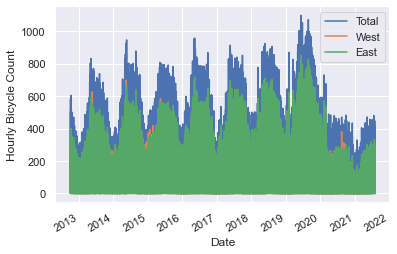

In [110]:
# 弗莱蒙特桥每小时通行的自行车数量
df.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

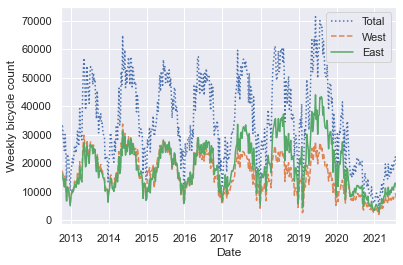

In [114]:
# 弗莱蒙特桥每周通行的自行车数量
weekly = df.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean of 30 days count')

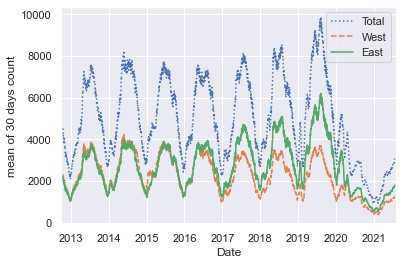

In [113]:
# 每 30 日自行车的移动日均值
daily = df.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':','--','-'])
plt.ylabel('mean of 30 days count')

<AxesSubplot:xlabel='Date'>

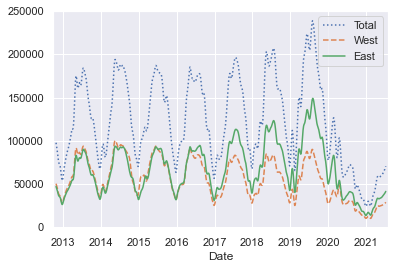

In [117]:
# 用高斯平滑方法处理每周自行车的移动均值
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

<AxesSubplot:xlabel='time'>

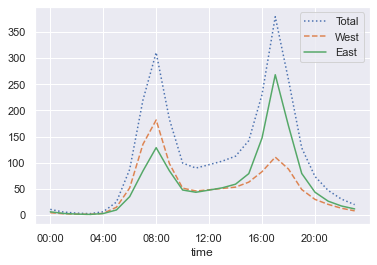

In [119]:
# 每小时的自行车流量
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

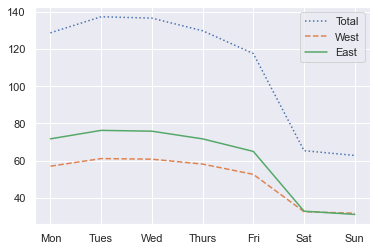

In [120]:
# 每周每天的自行车流量
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

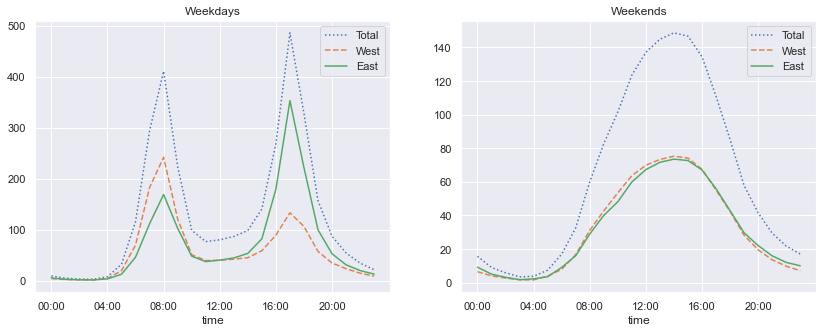

In [124]:
# 工作日与双休日每小时的自行车流量
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend,df.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':','--','-'])

## 高性能 Pandas: eval() & query()

> 一般地, 运算简单或 DataFrame 数据量较少之时不适用 eval() 函数, 在 DataFrame 大于 10000 行时使用 eval(), 性能会得到明显提升  

### df.eval()

#### 列间运算

In [24]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

In [25]:
%timeit df1 + df2 + df3 + df4
%timeit pd.eval('df1 + df2 + df3 + df4')

149 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
148 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.615875,0.525167,0.047354
1,0.330858,0.412879,0.441564
2,0.689047,0.559068,0.230350
3,0.290486,0.695479,0.852587
4,0.424280,0.534344,0.245216


In [27]:
%timeit (df['A'] + df['B']) / (df['C'] - 1)
%timeit pd.eval("(df.A + df.B) / (df.C - 1)")

471 µs ± 31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.97 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 新增和修改列

In [28]:
df.eval("D = (A+B)/C", inplace=True) # 新增列
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,24.095868
1,0.330858,0.412879,0.441564,1.684325
2,0.689047,0.559068,0.230350,5.418335
3,0.290486,0.695479,0.852587,1.156439
4,0.424280,0.534344,0.245216,3.909296


In [29]:
df.eval("D = (A-B)/C", inplace=True) # 修改已有列
df.head()

,A,B,C,D
0,0.615875,0.525167,0.047354,1.915527
1,0.330858,0.412879,0.441564,-0.185752
2,0.689047,0.559068,0.230350,0.564268
3,0.290486,0.695479,0.852587,-0.475016
4,0.424280,0.534344,0.245216,-0.448844


#### 引用局部变量

In [31]:
col_mean = df.mean(axis=1)
res1 = df["A"]+col_mean
res2 = df.eval("A+@col_mean")
np.allclose(res1, res2) # 比较结果是否相同

True

### df.query()

#### 过滤运算

In [32]:
res1 = df[(df.A<0.5) & (df.B<0.5)]
res2 = df.query("A<0.5 and B<0.5")
np.allclose(res1, res2)

True

In [38]:
res3 = df[df.eval("A<0.5 & B<0.5")]
np.allclose(res1, res3)

True

#### 引用局部变量

In [39]:
C_mean = df["C"].mean()
res1 = df[(df.A<C_mean) & (df.B<C_mean)]
res2 = df.query("A<@C_mean and B<@C_mean")
np.allclose(res1, res2)

True

### 何时使用?
> 每段中间过程都需要显式地分配内存  
> 如果 A 数组和 B 数组非常大, 这么运算就会占用大量的时间和内存消耗  

```py
x = df[(df.A<0.5) & (df.B<0.5)]
# 相当于
tmp1 = df.A<0.5
tmp2 = df.B<0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]
```


In [40]:
df.values.nbytes # 估算一下变量的内存消耗

32000

> **总结**: 在实际工作中, 普通的计算方法与 eval/query 计算方法在计算时间上的差异并非总是那么明显, 普通方法在处理较小的数组时反而速度更快! eval/query 方法的优点主要是节省内存, 有时语法也更加简洁.  
